<font size=4><b> [실습]lec03.머신러닝_전처리 : 범주형(categorical) 변수

### 범주형 변수 categorical data 처리
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* 범주화(Bining)

> <font size=4><b>(1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [3]:
df=pd.read_csv("../comp/titanic/train.csv")[["Pclass", "Age", "Embarked"]][:10]
df.columns = df.columns.str.lower()
df.head(10)

,pclass,age,embarked
0,3,22.0,S
1,1,38.0,C
2,3,26.0,S
3,1,35.0,S
4,3,35.0,S
5,3,NaN,Q
6,1,54.0,S
7,3,2.0,S
8,3,27.0,S
9,2,14.0,C


In [4]:
data = df['embarked']
le = LabelEncoder()
le.fit(data)                # array like of shape
res = le.transform(data)
print(res)

[2 0 2 2 2 1 2 2 2 0]


In [5]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [6]:
le.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

In [7]:
df['le'] = res
df.head(3)

,pclass,age,embarked,le
0,3,22.0,S,2
1,1,38.0,C,0
2,3,26.0,S,2


> <font size=4><b>(2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음 → reshape(-1,1)을 이용해 Matrix로 변환  (N,) → (N,1)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
#data.shape   # (10,)

#np.array(data)
#data.to_numpy()
#data.values
print( data.values.reshape(-1,1).shape )        # (10,1)
data = data.values.reshape(-1,1)

(10, 1)


In [10]:
oh = OneHotEncoder(sparse=False, dtype=np.int32)
oh.fit(data)                  # array like of shape (n_samples, n_features) : 행렬
res = oh.transform(data)
print(res)

[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [11]:
df[["a","b","c"]] = res
df.head(3)

,pclass,age,embarked,le,a,b,c
0,3,22.0,S,2,0,0,1
1,1,38.0,C,0,1,0,0
2,3,26.0,S,2,0,0,1


> <font size=4><b>(3) get_dummies() = 라벨인코딩(Label Encoding)+원핫인코딩(One-hot Encoding) + 결측처리

In [12]:
res = pd.get_dummies(df['embarked'], prefix='dummi', dtype=int)
res

,dummi_C,dummi_Q,dummi_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [13]:
dd = pd.concat([df, res], axis=1)
dd

,pclass,age,embarked,le,a,b,c,dummi_C,dummi_Q,dummi_S
0,3,22.0,S,2,0,0,1,0,0,1
1,1,38.0,C,0,1,0,0,1,0,0
2,3,26.0,S,2,0,0,1,0,0,1
3,1,35.0,S,2,0,0,1,0,0,1
4,3,35.0,S,2,0,0,1,0,0,1
5,3,NaN,Q,1,0,1,0,0,1,0
6,1,54.0,S,2,0,0,1,0,0,1
7,3,2.0,S,2,0,0,1,0,0,1
8,3,27.0,S,2,0,0,1,0,0,1
9,2,14.0,C,0,1,0,0,1,0,0


* 여러 컬럼 한번에 변환

In [14]:
df=pd.read_csv("../comp/titanic/train.csv")[["Pclass", "Age", "Embarked", "Sex"]][:10]
df.columns = df.columns.str.lower()
df.head(10)

,pclass,age,embarked,sex
0,3,22.0,S,male
1,1,38.0,C,female
2,3,26.0,S,female
3,1,35.0,S,female
4,3,35.0,S,male
5,3,NaN,Q,male
6,1,54.0,S,male
7,3,2.0,S,male
8,3,27.0,S,female
9,2,14.0,C,female


In [15]:
# 보통은 get_dummies를 이용해 통으로 불러온다.
df = pd.get_dummies(df)
df.head()

,pclass,age,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,22.0,False,False,True,False,True
1,1,38.0,True,False,False,True,False
2,3,26.0,False,False,True,True,False
3,1,35.0,False,False,True,True,False
4,3,35.0,False,False,True,False,True


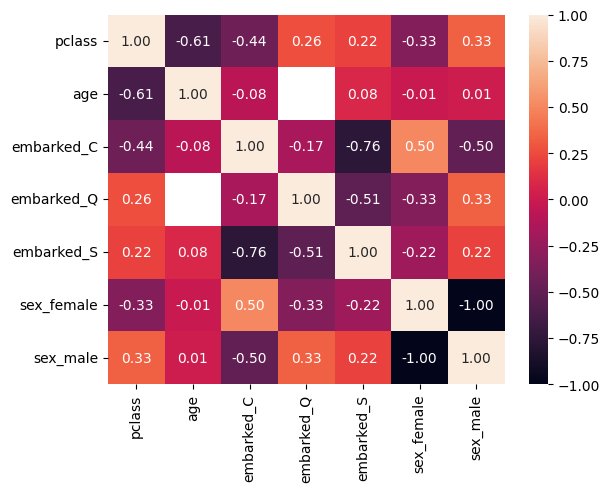

In [16]:
# 개별 값은 의미가 없지만, 상관관계도에서 의미가 있을 수도 있다
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# 스케일링

<img src = https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png>

In [17]:
from sklearn.datasets import load_iris

In [18]:
mydic = load_iris()
mydic.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
mydic.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [20]:
mydic['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [21]:
mydic['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
mydic['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
mydic['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
df = pd.DataFrame(data = mydic.data, columns=mydic.feature_names)
df.columns = ['sl','sw','pl','pw']
df['target'] = mydic['target']
df

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


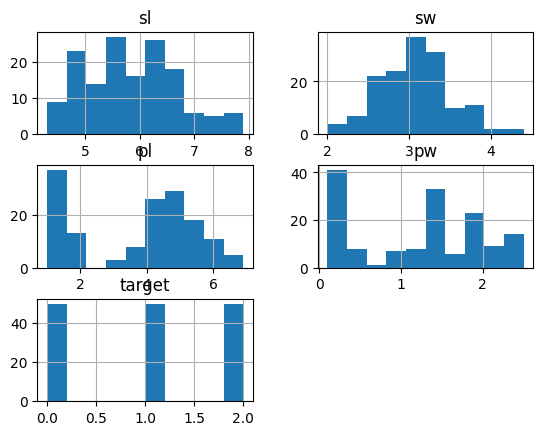

In [26]:
df.hist()
plt.show()

<Axes: >

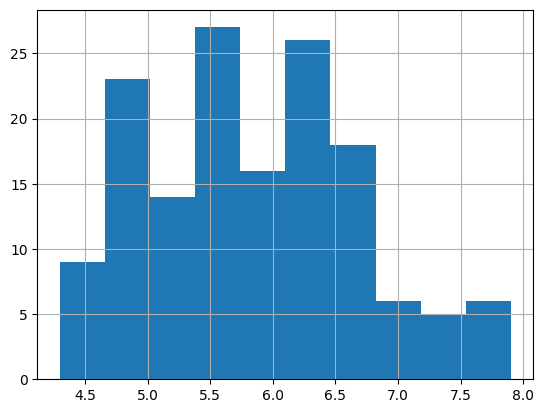

In [27]:
df['sl'].hist()

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [29]:
mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [30]:
data = df['sl'].values.reshape(-1,1)
ss.fit(data)
df['sl_ss'] = ss.transform(data)

<Axes: >

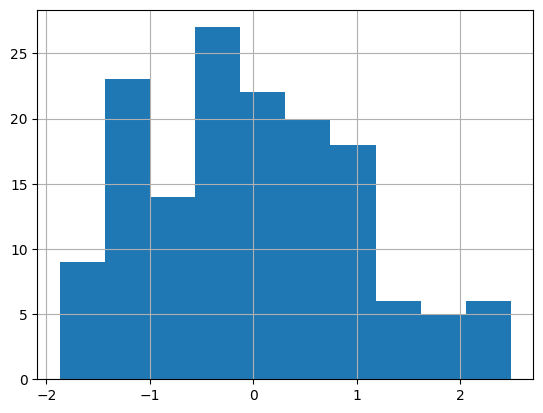

In [31]:
df['sl_ss'].hist()

In [32]:
data = df['sl'].values.reshape(-1,1)
mm.fit(data)
df['sl_mm'] = mm.transform(data)
df.head()

,sl,sw,pl,pw,target,sl_ss,sl_mm
0,5.1,3.5,1.4,0.2,0,-0.900681,0.222222
1,4.9,3.0,1.4,0.2,0,-1.143017,0.166667
2,4.7,3.2,1.3,0.2,0,-1.385353,0.111111
3,4.6,3.1,1.5,0.2,0,-1.506521,0.083333
4,5.0,3.6,1.4,0.2,0,-1.021849,0.194444


In [33]:
df['sl_mm'].describe()

count    150.000000
mean       0.428704
std        0.230018
min        0.000000
25%        0.222222
50%        0.416667
75%        0.583333
max        1.000000
Name: sl_mm, dtype: float64

<Axes: >

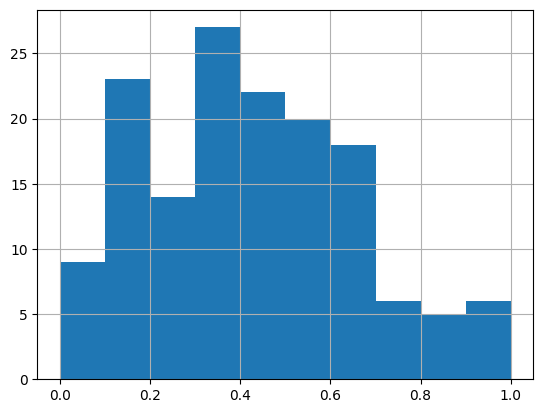

In [34]:
df['sl_mm'].hist()

In [35]:
from sklearn.model_selection import train_test_split

```python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

In [36]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((120, 7), (30, 7))

* <font color=red size=4> <b> train 데이터에만 fit() -> test를 스케일링하면 공모전 실격 사유!
* <font color=red size=4> <b> 위의 fit으로 train, test에 동일 스케일로 transform()

In [37]:
train = pd.DataFrame(data = range(0,11))
train

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [38]:
test = pd.DataFrame(data = range(1,6))
test

,0
0,1
1,2
2,3
3,4
4,5


In [39]:
mm.fit(train)
res = mm.transform(train)
res

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [40]:
#mm.fit(test)
res2 = mm.transform(test)
res2

array([[0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5]])

* train